<a href="https://colab.research.google.com/github/junojano/Machine-Learning/blob/main/K_neighborsRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
 회귀 알고리즘과 모델 규제


회귀(regression) : 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제

K-최근접 이웃분류 vs k-최근접 이웃 회귀: k-최근접 이웃알고리즘을 사용해 각각 분류 문제와 회귀 문제를 해결하는 방법


k-최근접 이웃 분류: 최근접 이웃 네모 2개, 세모 1개 따라서 x의 클래스는 네모



k-최근접 이웃 회귀: 최근접 이웃은 100, 80, 60 따라서 x는 


(100 + 80 + 60)/3 = 80


In [2]:
# 3-1 회귀 문제 다루기_K-최근접 이웃 회귀

## 데이터 준비

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 2.5, 
                        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0,])

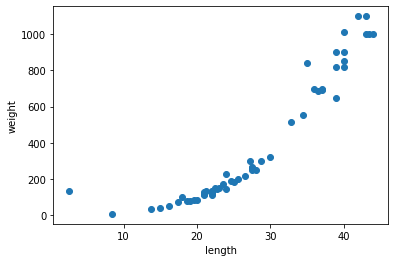

In [5]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)  # 데이터를 산점도로 표시 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split # train 훈련 세트 test 테스트 세트로 나누기 
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)

In [9]:
#사이킷런에서 사용할 훈련세트는 2차원 배열, 현재 훈련,테스트 세트는 1차원 배열이므로 변경 

train_input = train_input.reshape(-1,1) # reshape 란 배열의 크기를 지정, 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우게 됨 
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape) # 변수.shape 는 행과 열을 추출

(42, 1) (14, 1)


In [10]:
#결정계수 (R^2) 
#사이킷런에서  k - 최근접 이웃 회귀 알고리즘을 구현한 클래스_KNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# k - 최근접 이웃 회귀 모델을 훈련 
knr.fit(train_input,train_target)

print(knr.score(test_input,test_target)) # 테스트 점수를 확인해보자 값은 정확도 , 정답을 맞힌 개수의 비율 


0.9893480173587588


결정 계수가 1에 가까울 수록 양의 상관 관계이다 


In [14]:
#타깃과 예측한 값 사이의 차이를 구해 보면 예측에서 얼마나 오차가 났는지 가늠하기 유용하다 
#결과는 타깃값과 얼마나 다른지 알 수 있다.

from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산함 
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

23.72857142857143


In [15]:
##  과대적합 vs 과소적합

# 앞에서 훈련한 모델을 사용해 훈련 세트의 R^2 점수를 확인
print(knr.score(train_input, train_target))

# 훈련세트보다 테스트 세트(0.9893480173587588)의 점수가 높으니 과소적합!

0.9698823289099254


In [18]:
#과소적합일 경우 모델을 조금 더 복잡하게 만들면 해결이 가능!!
# k-최근접 이웃 알고리즘 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이기

# 이웃의 개수는 기본 5로 설정되어있는데 3으로 변경
knr.n_neighbors = 3

# 모델을 다시 훈련 
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
# k값을 줄였더니 훈련 세트의 R^2 점수가 높아졌다! 0.9698823289099255 -> 0.9804899950518966

0.9804899950518966


In [19]:
# 테스트 세트의 점수를 확인
print(knr.score(test_input, test_target))

# 과소적합을 해결
# 훈련 세트의 점수 0.9804899950518966 , 테스트 세트의 점수 0.9699093591724484

0.9699093591724485
